# Chapter 3: Data Manipulation with Pandas

Pandas is built on top of NumPy and provides an efficient implementation of a DataFrame (multidimensional arrays with attached row and column labels, and often have heterogenous types and/or missing data). 

NumPy's `ndarray` data structure provides essential features for the type of clean, well-organized data typically seen in numerical computing tasks. While it serves this purpose very well, NumPy's limitations become clear when we need more flexibility (attaching labels to data, working with missing data, etc.) and when attempting operations that do not map well to element-wise broadcasting (groupings, pivots, etc.)

**Introducing Pandas Objects**
At the very basic level, Pandas objects can be thought of as enhanced version of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices. The three fundamental Pandas data structures are `Series`, `DataFrame`, and `Index`. 
- `Series` is a one-dimensional array of indexed data.
    - has `values` and `index` attributes

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data)

In [ ]:
data.values

In [ ]:
data.index

The Pandas `Series` is much more general and flexible than the one-dimensional NumPy array that it emulates. The essential difference between the `Series` object and a one-dimensional NumPy array is the presence of the index: while the NumPy array has an *implicitly* defined integer index, the Pandas `Series` has an *explicitly* defined index associated with the values. 

The explicit index definition gives `Series` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type. 

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

We can even use non-contiguous or non-sequential indices. 

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

**Series as specialized dictionary**
You can think of a Pandas `Series` a bit like a specialization of a Python dictionary. A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a `Series` is a structure which maps typed keys to a set of typed values. 

The `Series` as dictionary analogy can be made even more clear by constructing a `Series` object directly from a Python dictionary:

In [ ]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

By default, a `Series` will be created where the index is drawn from the sorted keys. 

From here, typical dictionary-style item access can be performed:

In [ ]:
population['California']

Unlike a dictionary, the `Series` also supports array-style operations such as slicing:

In [ ]:
population['California':'Illinois']

**Constructing Series objects**

General format: `pd.Series(data,index=index)`
- note that index is an optional argument

In [ ]:
pd.Series([2,4,6])

`data` can be a dictionary, in which `index` defaults to the sorted dictionary keys:

In [ ]:
pd.Series({2:'a',1:'b',3:'c'})

**The Pandas DataFrame Object**
The `DataFrame` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.

**DataFrame as a generalized NumPy array**
A `DataFrame` is an analog of a two-dimensional array with both flexible row indices and flexible column names. 

In [ ]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

In [ ]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

Now that we have the area and population, we can use a dictionary to construct a single two-dimensional object containing this information. 

In [ ]:
states = pd.DataFrame({'Population': population,
                      'area':area})

states

In [ ]:
states.index

In [ ]:
states.columns

**DataFrame as specialized dictionary**
Where a dictionary maps a key to a value, a `DataFrame` maps a column name to a `Series` of column data. 

In [ ]:
states['area']

**Constructing DataFrame objects**
A Pandas `DataFrame` can be constructed in a variety of ways. 
- from a single Series object
- from a list of dicts
- from a dictionary of Series objects
- from a two-dimensional NumPy array
- from a NumPy structured array

In [ ]:
# from a single Series object
pd.DataFrame(population,columns=['population'])

In [ ]:
# from a list of dicts
data = [{'a':i, 'b': 2*i} for i in range(3)]
pd.DataFrame(data)

In [ ]:
# from a dictionary of Series objects
pd.DataFrame({'population': population,
              'area': area})

In [ ]:
# from a two-dimensional NumPy array
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

In [ ]:
# from a NumPy structured array
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
pd.DataFrame(A)

**The Pandas Index Object**
The `Index` object can be thought of either as an *immutable array* or as an *ordered set* (technically a multi-set, as `Index` objects may contain repeated values)

Pandas objects are designed to facilitate operations such as joins across datasets. The `Index` object follows many of the conventions used by Python's built-in `set` data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way:

In [ ]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [ ]:
indA & indB  # intersection

In [ ]:
indA | indB  # union

In [ ]:
indA ^ indB  # symmetric difference

**Data Indexing and Selection**

**Data Selection in Series**
A `Series` object acts in many ways like a one-dimensional NumPy array, and in many ways like a standard Python dictionary. 

**Series as dictionary**
Like a dictionary, the `Series` object provides a mapping from a collection of keys to a collection of values. 

In [ ]:
import pandas as pd
data = pd.Series([0.25,0.5,0.75,1.0],
                index=['a','b','c','d'])
data

We can also use dictionary-like Python expressions and methods to examine the key/indices and values. 

In [ ]:
data.keys()

In [ ]:
list(data.items())

`Series` objects can even be modified with a dictionary-like syntax.

In [ ]:
data['e'] = 1.25
data

**Series as one-dimensional array**
A `Series` provides array-style item selection via the same mechanisms as NumPy arrays (slices, masking, and fancy indexing). 

In [ ]:
# slicing by explicit index
data['a':'c']

In [ ]:
# slicing by implicit integer index
data[0:2]

Notice that when slicing with an explicit index (i.e., `data['a':'c']`), the final index is *included* in the slice, while when slicing with an implicit index (i.e.,`data[0:2]`), the final index is *excluded* from the slice.

In [ ]:
# masking
data[(data > 0.3) & (data < 0.8)]

In [ ]:
# fancy indexing
data[['a', 'e']]

**Indexers:loc,iloc,and ix**
Because of the potential confusion in the case of integer indexes, Pandas provides some special *indexer* attributes that explicitly expose certain indexing schemes. 

The `loc` attribute allows indexing and slicing that always reference the explicit index:

In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

print(data.loc[1])
print('\n')
print(data.loc[1:3])

The `iloc` attribute allows indexing and slicing that always references the implicit Python-style index:

In [ ]:
data.iloc[1]

In [ ]:
data.iloc[1:3]

A third indexing attribute,`ix`, is a hybrid of the two.The purpose of the ix indexer will become more apparent in the context of `DataFrame` objects.

**Data Selection in DataFrame**
Recall that a `DataFrame` acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of `Series` structures sharing the same index.

**DataFrame as a dictionary**

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

The individual `Series` that make up the columns of the `DataFrame` can be accessed via dictionary-style indexing of the column name (`data['area']`). Equivalently, we can use attribute-style access with column names that are strings (`data.area`). Though using the attribute style is a useful shorthand, keep in mind that it does not work for all cases. If the column names are not strings or if the column name conflicts with methods of the `DataFrame`, this attribute-style access is not possible. 

In [ ]:
data['area']

This dictionary-style syntax can also be used to modify the object. 

In [ ]:
data['density'] = data['pop'] / data['area']
data

**DataFrame as two-dimensional array**
We can examine the raw underlying data array using the `values` attribute.

In [ ]:
data.values

With thiis picture in mind, many familiar array-like observations can be done on the `DataFrame` itself. For example, we can transpose the full `DataFrame` to swap rows and columns:

In [ ]:
data.T

In [ ]:
data.values[0]

In [ ]:
data['area']

In [ ]:
data.iloc[:3,:2]

Similarly, using the `loc` indexer we can index the underlying data in an array-like style but using the explicit index and column names:

In [ ]:
data.loc[:"Illinois",:"pop"]

The `ix` indexer allows a hybrid of these two approaches (`loc` and `iloc`):



In [ ]:
data.ix[:3,:'pop']

Any of the familiar NumPy-style data access patterns can be used within these indexers. For example, in the `loc` indexer we can combine masking and fancy indexing. 

In [ ]:
data.loc[data['density']>100,['pop','density']]

# equivalent to 
data.loc[data.density >100,['pop','density']]

Any of these indexing conventions may be used to set or modify values.

In [ ]:
data.iloc[0, 2] = 90
data

**Additional indexing conventions**
While *indexing* refers to columns, *slicing* refers to rows.

In [ ]:
data['Florida':'Illinois']

Such slices can also refer to rows by number rather than by index.

In [ ]:
data[1:3]

Direct masking operations are also interpreted row-wise rather than column-wise:

In [ ]:
data[data.density>100]

**Operating on Data in Pandas**
One of the essential pieces of NumPy is the ability to perform quick element-wise operations, both with basic arithmetic (addition, subtraction, multiplication, etc) and with more sophisticated operations (trigonometric functions, exponential and logarithmic functions, etc.). Pandas inherits much of this functionality from NumPy and the ufuncs introduced earlier.

Pandas includes a couple useful twists. For unary operations like negation and trigonometric functions, these ufuncs will preserve index and column labels in the output. For binary operations such as addition and multiplication, Pandas will automatically align indices when passing the objects to the ufunc. This means that keeping the context of data and combinfing data from different sources become essentally foolproof with Pandas. 

**Ufuncs: Index Preservation**
Because Pandas is designed to worh with NumPy, any NumPy ufunc will work on Pandas `Series` and `DataFrame` objects.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0,10,4))
ser

In [ ]:
df = pd.DataFrame(rng.randint(0,10,(3,4)),
                  columns = ['A','B','C','D'])
df

If we apply a NumPy ufunc on either of these objects, the result will be another Pandas object with the indices preserved.

In [ ]:
np.exp(ser)

In [ ]:
np.sin(df*np.pi/4)

**UFuncs: Index Alignment**
For binary operations on two `Series` or `DataFrame`objects, Pandas will align indices in the process of performing the operation. This is very convenient when working with incomplete data.

**Index alignment in Series**
Suppose we are combining two different data sources, and find only the top three US states by area and the top three US states by population. 

In [ ]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [ ]:
# computing population density:
population/area

The resulting array contains the *union* of indices of the two input arrays. Any item for which one or the other does not have an entry is marked with `NaN`.

In [ ]:
A = pd.Series([2,4,6], index=[0,1,2])
B = pd.Series([1,3,5], index=[1,2,3])
A+B

If using NaN values is not the desired behavior, the fill value can be modified using appropriate object methods in place of the operators. For example, calling `A.add(B)` is equivalent to calling `A+B` but allows optional specification of the fill value for any elements in A or B that might be missing. 

From documentation:

**fill_value** - None or float value, default None (NaN)
- Fill existing missing (NaN) values, and any new element needed for successful Series alignment, with this value before computation.

In [ ]:
A.add(B,fill_value=0)

**Index alignment in DataFrame**

In [ ]:
A = pd.DataFrame(rng.randint(0,20,(2,2)),
                columns = ['A','B'])
A

In [ ]:
B = pd.DataFrame(rng.randint(0,10,(3,3)),
                columns = ['B','A','C'])
B

In [ ]:
A + B

Notice that indices are aligned correctly irrespective of their order in the two objects. We can use the associated object's artithmetic method and pass any desired fill_value to be used in place of the missing entries. Here we'll fill with the mean of all values in A:

In [ ]:
fill = A.stack().mean()
A.add(B,fill_value=fill)

|**Python Operator**| **Pandas Method(s)**|
|-------------------|---------------------|
|`+`|`add()`|
|`-`|`sub()`|
|`*`|`mul()`|
|`/`|`div()`|
|`//`| `floordiv()`|
|`%`|`mod()`|
|`**`|`pow()`|


**Ufuncs: Operations Between DataFrame and Series**
Operations between a `DataFrame` and `Series` are similar to operations between a two-dimensional and one-dimensional NumPy array.

In [ ]:
A = rng.randint(10,size=(3,4))
A

In [ ]:
A - A[0]

According to NumPy's broadcasting rules, subtraction between a two-dimensional array and one of its rows is applied row-wise. In Pandas, the convention similarly operates row-wise by default.

In [ ]:
df = pd.DataFrame(A,columns=['Q','R','S','T'])
df - df.iloc[0]

If you would instead like to operate column-wise, you can use the object methods mentioned earlier, while specifying the `axis` keyword:

In [ ]:
df.subtract(df['R'],axis=0)

**Handling Missing Data**
Different data sources may indicate missing data in different ways. 

**Trade-Offs in Missing Data Conventions**
There are many schemes that have been developed to indictae the presence of missing data in a table or DataFrame. Generally, they revolve around one of two strategies: using a *mask* that globally indicates missing values, or choosing a *sentinel value* that indicates a missing entry.

In the masking approach, the mask might be an entirely seperate Boolean array, or it may involve appropriation of one bit in the data representation to locally indicate the null status of a value.

In the sentinel approach, the sentinel value could be some data-specific convention, such as indicating a missing integer value with -999 or some rate bit pattern, or it could be a more global convention such as indicating a missing floating-point value with NaN (Not a Number).

None of these approaches is without trade-offs: use of a seperate mask array  adds overhead in both storage and computation. A sentinel value reduces the range of valid values that can be represented, and may require extra logic in CPU and GPU arithmetic. Common special values like NaN are not available for all data types. 

**Missing Data in Pandas**
The way in which Pandas handles missing values is constrained by its reliance on the NumPy package, which does not have a built-in notion of NA values for non-floating-point data types. 

Pandas chose to use sentinels for missing data, and further chose to use two already-existing Python null values: the special floating-point `NaN` value and the Python `None` object. 

**`None`: Pythonic missing data**
Because it is a Python object, `None` cannot be used in any arbitrary NumPy/Pandas array, but only in arrays with data type `object`.

In [ ]:
import numpy as np
import pandas as pd

vals = np.array([1,None,3,4])
vals

This `dtype=object` means that the best common type representation NumPy could infer for the contents of the array is that they are Python objects. This results in much more overhead than the typically fast operations seen for arrays with native types:

In [ ]:
for dtype in ['object','int']:
    print("dtype = ",dtype)
    %timeit np.arange(1E6,dtype=dtype).sum()
    print()

The use of Python objects in an array also means that if you perform aggregations like `sum()` or `min()` across an array with a `None` value, you will generally get an error.

**`NaN`: Missing Numerical Data**
`NaN` (acronym for *Not a Number*) is different; it is a special floating-point value.

In [ ]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

Be aware that `NaN` is like a data virus - it infects any other object it touches. Regardless of the operation, the result of arithmetic with `NaN` will be another `NaN`.

In [ ]:
1+np.nan

In [ ]:
0*np.nan

In [ ]:
vals2.sum(),vals2.min(),vals2.max()

NumPy does provide special aggregations that will ignore these missing values:

In [ ]:
np.nansum(vals2),np.nanmin(vals2),np.nanmax(vals2)

Keep in mind that `NaN` is specifically a floating-point value; there is no equivalent for integers, strings, or other types. 

**`NaN` and `None` in Pandas**
Pandas is built to handle both `NaN` and `None` and converts between them when appropriate.

In [ ]:
pd.Series([1,np.nan,2,None])

Notice how the `None` is automatically upcast to a floating-point `NaN` type. The following table lists the upcasting conventions in Pandas when NA values are introduced:

|**Typeclass**|**Conversion when storing NAs**|**NA Sentinel Value**|
|-------------|-------------------------------|---------------------|
|`floating`| No change| `np.nan`|
|`object`| No change| `None` or `np.nan`|
|`integer`| Cast to `float64`| `np.nan`|
|`boolean`| Cast to `object`| `None` or `np.nan`|

Keep in mind that in Pandas, string data is always stored with an `object` dtype.

**Operating on Null Values**
Pandas treats `None` and `NaN` as essentially interchangeable for indicating missing or null values. There are several useful methods for detecting, removing, and replacing null values in Pandas data structures.
- `isnull()`: Generates a boolean mask indicating missing values.
- `notnull()`: Opposite of `isnull()`.
- `dropna()`: Returns a filtered version of the data.
- `fillna()`: Returns a copy of the data with missing values filled or imputed.

**Detecting null values**
Use `isnull()` and `notnull()`

In [ ]:
data = pd.Series([1,np.nan,'hello',None])

data.isnull()

In [ ]:
data.notnull()

In [ ]:
# Boolean mask: return rows where data is not null
data[data.notnull()]

**Dropping null values**
`dropna()` and `fillna()`

In [ ]:
data.dropna()

In [ ]:
df = pd.DataFrame([[1,np.nan,2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
df

We cannot drop single values from a `DataFrame`; we can only drop full rows or full columns. By default, `dropna()` will drop all rows in which *any* null value is present.

In [ ]:
df.dropna()

Alternatively, we can drop NA values along a different axis; `axis=1` drops all columns containing a null value.

In [ ]:
df.dropna(axis='columns')

You might rather be interested in dropping rows or columns with *all* NA values, or a majority of NA values. This can be specified through the `how` or `thresh` parameters.

The default is `how='any'` such that any row or column (depending on the `axis` keyword) containing a null value will be dropped. You can also specify `how='all'`, which will only drop rows/columns that are *all* null values. For finer-grained control, the `thresh` parameter lets you specify a minimum number of non-null values for the row/column to be kept.

In [ ]:
df.dropna(axis='rows',thresh=3)

**Filling null values**
Pandas provides the `fillna()` method which returns a copy of the array with the null values replaced.

In [ ]:
data = pd.Series([1, np.nan, 2, None, 3],index=['a','b','c','d','e'])
data

In [ ]:
data.fillna(0)

We can specify a forward-fill to propagate the previous value forward. Or we can specify a back-fill to propagate the next values backward.

In [ ]:
# forward-fill
data.fillna(method='ffill')

In [ ]:
data.fillna(method='bfill')

For `DataFrame`s, we can also specify an `axis` along which the fills take place. 

In [ ]:
df

In [ ]:
df.fillna(method='ffill',axis=1)

Notice that if a previous value is not available during a forward fill, the NA value remains. 

**Hierarchical Indexing**
Pandas provides `Panel` and `Panel4D` objects that natively handle three-dimensional and four-dimensional data, a far more common practice is to make use of *hierarchical indexing* also known as *multi-indexing* to incorporate multiple index levels within a single index. In this way, higher-dimensional data can be compactly represented within a one-dimensional `Series` and two-dimensional `DataFrame` objects

**A Multiply Indexed Series**
Let's start by considering how we might represent two-dimensional data within a one-dmensional `Series`.

**The bad way**
Suppose you would like to track data about states from two different years. Using the Pandas tools, you might be tempted to simply use Python tuples as keys:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
index = [('California',2000),('California',2010),
         ('New York',2000),('New York',2010),
         ('Texas',2000),('Texas',2010)]

populations = [33871648,37253956,
              18976457,19378102,
              20851820,25145561]

pop = pd.Series(populations,index=index)
pop

This method is not very convenient. Imagine if you wanted to grab all the values from 2010.

In [ ]:
pop[[i for i in pop.index if i[1]==2010]]

Although this produces the desired result, it is not as clean (or as efficient for large datasets) as the slicing syntax in Pandas.

**The better way: Pandas MultiIndex**
Notice that the `MultiIndex` contains multiple *levels* of indexing as well as multiple *labels* for each data point which encode those levels. If we re-index our series with this `MultiIndex`, we see the hierarchical representation of the data.

In [ ]:
index = [('California',2000),('California',2010),
         ('New York',2000),('New York',2010),
         ('Texas',2000),('Texas',2010)]

index = pd.MultiIndex.from_tuples(index)
index

In [ ]:
pop = pop.reindex(index)
pop

Here the first two columns of the `Series` representation show the multiple index values, while the third column shows the data. In this multi-index representation, any blank entry indicates the same value as the line above it. 

In [ ]:
# acces all data for which the second index is 2010
pop[:,2010]

**MultiIndex as extra dimension**
The `unstack()` method will convert a multiply indexed `Series` into a conventionally indexed `DataFrame`. The `stack()` method provides the opposire operation.

In [ ]:
pop_df = pop.unstack()
pop_df

In [ ]:
pop_df.stack()

You might wonder why we would bother with hierarchical indexing at all. The reason is: just as we were able to use multi-indexing to represent two-dimensional data within a one-dimensional `Series`, we can also use it to represent data of three or more dimensions in a `Series` or `DataFrame`. Each extra level in a multi-index represents an extra dimension of data; taking advantage of this property gives us much more flexibility in the types of data we can represent. 

In [ ]:
pop_df = pd.DataFrame({'total':pop,
                       'under18':[9267089,9284094,
                                 4687374,4318033,
                                 5906301,6879014]})
pop_df

All the ufuncs work with hierarchical indices as well. 

In [ ]:
f_u18 = pop_df['under18']/pop_df['total']
f_u18.unstack()

**Methods of MultiIndex Creation**
The most straightforward way to construct a multiply indexed `Series` or `DataFrame` is to simply pass a list of two or more index arrays to the constructor. When following this approach, the work of creating the `MultiIndex` is done in the background. 

In [ ]:
df = pd.DataFrame(np.random.rand(4,2),
                  index=[['a','a','b','b'],[1,2,1,2]],
                  columns=['data1','data2'])
df

Similarly, if you pass a dictionary with appropriate tuples as keys, Pandas will automatically recognize this and use a `MultiIndex` by default.

In [ ]:
data = {('California',2000): 33871648,
        ('California',2010): 37253956,
        ('Texas',2000): 20851820,
        ('Texas',2010): 25145561,
        ('New York',2000): 18976457,
        ('New York',2010): 19378102}

pd.Series(data)

Nevertheless, it is sometimes useful to explicitly create a `MultiIndex`. 

**Explicit MultiIndex constructors**
For more flexibility in how the index is constructed, you can insteas use the class method constructors available in the `pd.MultiIndex`.

In [ ]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

In [ ]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

In [ ]:
# Make a MultiIndex from the cartesian product of multiple iterables
pd.MultiIndex.from_product([['a','b'],[1,2]])

Similarly, you can construct the `MultiIndex` directly using its internal encoding by passing `levels` (a list of lists containing available index values for each level) and `labels` (a list of lists that reference these labels). 

In [ ]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

**MultiIndex level names**
Sometimes it is convenient to name the levels of the `MultiIndex`. With more involved datasets, this can be a useful way to keep track of the meaning of various index values. This can be accomplished by passing the `names` argument to any of the above `MultiIndex` constructors, or by setting the `names` attribute of the index after the fact:

In [ ]:
pop.index.names = ['state','year']
pop

**MultiIndex for columns**
Sometimes multi-indexing for both rows and columns can come in handy. For complicated records containing multiple labeled measuremnts across mutliple times for many subjects (e.g., people,countries,cities,etc.) use of hierarchical rows and columns can be extremely convenient.

**Indexing and Slicing a MuliIndex**

**Multiply Indexed Series**

In [ ]:
pop

We can access single elements by indexing with multiple terms:

In [ ]:
pop['California', 2000]

The `MultiIndex` also supports *partial indexing*, or indexing just one of the levels in the index. The result is another `Series`, with the lower-level indices maintained:

In [ ]:
pop['California']

Partial slicing is available as well, as long as the `MutliIndex` is sorted.

In [ ]:
pop.loc['California':'New York']

With sorted indices, partial indexing can be performed on lower levels by passing an empty slice in the first index:

In [ ]:
pop.loc[:,2000]

You can also do selection based on Boolean masks:

In [ ]:
pop.loc[pop>22000000]

Selection based on fancy indexing also works:

In [ ]:
pop.loc[['California','Texas']]

**Multiply indexed DataFrames**

In [ ]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])

columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], 
                                      ['HR', 'Temp']],
                                     names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

In [ ]:
health_data

Remember that columns are primary in a `DataFrame`, and the syntax used to multiply indexed `Series` applies to the columns. 

In [ ]:
health_data['Guido','HR']

Pandas provides the `IndexSlice` object.

In [ ]:
idx = pd.IndexSlice
health_data.loc[idx[:,1],idx[:,'HR']]

**Rearranging Multi-Indices**
One of the keys to working with multiply indexed data is knowing how to effectively transform the data. There are a number of operations that will preserve all the information in the dataset, but rearrange it for the purpose of various computations. We saw an example of this in the `stack()` and `unstack()` methods. But there are many more ways to finely control the rearrangement of data between hierarchical indices and columns. 

**Sorted and unsorted indices**
Many of the `MultiIndex` slicing operations will fail if the index is not sorted. 

In [ ]:
index = pd.MultiIndex.from_product([['a','c','b'],[1,2]])
data = pd.Series(np.random.rand(6),index=index)
data.index.names = ['char','int']
data

If we try to take a partial slice of this index, it will result in an error:

In [ ]:
try:
    data['a':'b']
except KeyError as e:
    print(e)

This is the result of the MultiIndex not being sorted in lexographical order. Pandas provides a number of convenience routines to perform this type of sorting: `sort_index()` and `sortlevel()`.

In [ ]:
data = data.sort_index()
data

With the index sorted in this way, partial slicing will work as expected:

In [ ]:
data['a':'b']

**Stacking and unstacking indices**
It is possible to convert a dataset from a stacked multi-index to a simple two-dimensional representation. 

In [ ]:
pop

In [ ]:
pop.unstack(level=0)

In [ ]:
pop.unstack(level=1)

The opposite of `unstack()` is `stack()` which can be used to recover to the original series:

In [ ]:
pop.unstack().stack()

**Index setting and resetting**
Another way to rearrange hierarchical data is to turn the index labels into columns; this can be accomplished with the `reset_index` method.

In [ ]:
pop_flat = pop.reset_index(name='population')
pop_flat

Often when working with data in the real world, the raw input data looks like this and it's useful to build a `MultiIndex` from the column values. This can be done with the `set_index` method of the `DataFrame`.

In [ ]:
pop_flat.set_index(['state','year'])

**Data Aggregations on Multi-Indices**
We've previously seen that Pandas has built-in data aggregation methods, such as `mean()`, `sum()`, and `max()`. For hierarchically indexed data, these can be passed a `level` parameter that controls which subset of the data the aggregate is computed on.

In [ ]:
health_data

Perhaps we'd like to average-out the measurements in the two visits each year. We can do this by naming the index level we'd like to explore.

In [ ]:
data_mean = health_data.mean(level='year')
data_mean

By further making use of the `axis` keyword, we can take the mean among levels of the columns as well. This syntax is a short cut to the `GroupBy` functionality.

In [ ]:
data_mean.mean(axis=1,level='type')

**Combining Datasets: Concat and Append**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def make_df(cols,ind):
    """Quickly make a DataFrame"""
    data = {c:[str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data,ind)

# example DataFrame
make_df('ABC',range(3))

We will create a quick class that allows us to display multiple `DataFrame`s side by side. This code makes used of the special `_repr_html_` method, which IPython uses to implement its rich object display.

In [ ]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    
    def __init__(self,*args):
        self.args = args
    
    def _repr_html_(self):
        return '\n'.join(self.template.format(a,eval(a)._repr_html_()) for a in self.args)
    
    def __repr__(self):
         return '\n\n'.join(a + '\n' + repr(eval(a)) for a in self.args)

**Recall: Concatentation of NumPy Arrays**
Concatenation of `Series` and `DataFrame` objects is very similar to concatenation of NumPy arrays, which can be done via the `np.concatenate` function. The first argument is a list or tuple of arrays to concatenate. Additionally, it takes an `axis` keyword that allows you to specify the axis along which the result will be concatenated,

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

In [ ]:
x = [[1,2],
     [3,4]]
np.concatenate([x,x],axis=1)

**Simple Concatenation with `pd.concat`**
```python
pd.concat(objs, axis=0, join='outer', join_axes=None,                           ignore_index=False, keys=None, levels=None, names=None,               verify_integrity=False, copy=True)```

`pd.concat()` can be used for simple concatenation of `Series` or `DataFrame` objects. 

In [ ]:
ser1 = pd.Series(['A','B','C'],index=[1,2,3])
ser2 = pd.Series(['D','E','F'],index=[4,5,6])

print(ser1)
print('\n')
print(ser2)

In [ ]:
pd.concat([ser1,ser2])

It also works to concatenate higher-dimensional objects, such as `DataFrame`s:

In [ ]:
df1 = make_df('AB',[1,2])
df2 = make_df('AB',[3,4])
display('df1','df2','pd.concat([df1,df2])')

By default, the concatenation takes place row-wise within the `DataFrame` (i.e., `axis=0`). `pd.concat` allows specification of an axis along which concatenation will take place.

In [ ]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis='columns')")

**Duplicate indices**
One difference between `np.concatenate` and `pd.concat` is that Pandas concatenation *preserves indices* even if the result will have duplicate indices! 

In [ ]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

While this is valid within `Dataframe`s, the outcome is often undesireable. `pd.concat()` gives us a few ways to handle it. 

**Catching the repeats as en error**
If you'd like to simply verify that the indices in the result of `pd.concat()` do not overlap, you can specify the `verify_integrity` flag. With this set to True, the concatenation will raise an exception if there are duplicate indices.

In [ ]:
try:
    pd.concat([x,y], verify_integrity=True)
except ValueError as e:
    print("ValueError:",e)

**Ignoring the index**
Sometimes the index itself does not matter, and you would prefer it to simply be ignored. This option can be specified using the `ignore_index` flag. With this set to true, the concatenation will create a new integer index for the resulting `Series`.

In [ ]:
display('x','y','pd.concat([x,y],ignore_index=True)')

**Adding MultiIndex keys**
Another option is to use the `keys` option to specify a label for the data sources; the result will be a hierarchically indexed series containing the data.

In [ ]:
display('x','y',"pd.concat([x,y],keys=['x','y'])")

**Concatenation with joins**
In the simple examples we just looked at, we were mainly concatenating `DataFrame`s with shared column names. In practice, data from different sources might have different sets of column names, and `pd.concat` offers several options in this case. Consider the concatenation of the following two `DataFrame`s, which have some (but not all!) columns in common.  

In [ ]:
df5 = make_df('ABC',[1,2])
df6 = make_df('BCD',[3,4])
display('df5', 'df6', 'pd.concat([df5, df6])')

By default, the entries for which no data is available are filled with NA values. To change this, we can specify one of several options for the `join` and `join_axes` parameters of the concatenate function. By default, the join is a union of the input columns (`join='outer'`), but we can change this to an intersection of the columns using (`join='inner'`).

In [ ]:
display('df5','df6',
       "pd.concat([df5, df6], join='inner')")

Another option is to directly specify the index of the remaining columns using the `join_axes` argument, which takes a list of index objects. Here we'll specify that the returned columns should be the same as those of the first input:

In [ ]:
display('df5','df6',
       "pd.concat([df5, df6], join_axes=[df5.columns])")

Here we'll specify that the returned columns should be the same as those of the second input:

In [ ]:
display('df5','df6',
       "pd.concat([df5, df6], join_axes=[df6.columns])")

**The `append()` method**

Because direct array concatenation is so common, `Series` and `DataFrame` objects have an `append` method that can accomplish the same thing in fewer keystrokes. Rather than calling `pd.concat([df1,df2])`, you can simply call `df1.append(df2)`.

In [ ]:
display('df1', 'df2', 'df1.append(df2)')

Keep in mind that unlike the `append()` methods of Python lists, the `append()` method in Pandas does not modify the original object-instead it creates a new object with the combined data. It is also not a very efficient method, because it involves creation of a new index and data buffer. Thus, if you plan to do multiple `append` operations, it is generally better to build a list of `DataFrame`s and pass them all at once to the `concat()` function.

**Combining Datasets: Merge and Join**
One essential feature offered by Pandas is its high-performance, in-memory join and merge operations. The main interface for this is the `pd.merge` function.

**Relational Algebra**
The behavior implemented in `pd.merge()` is a subset of what is known as *relational algebra* which is a formal set of rules for manipulating relational data, and forms the conceptual foundation of operations available in most databases.

**Categories of Joins**
The `pd.merge()` function implements a number of types of joins: the *one-to-one*, *many-to-one*, and *many-to-many* joins.

**One-to-one joins**

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

To combine this information into a single `DataFrame`, we can use the `pd.merge()` function:

In [ ]:
df3 = pd.merge(df1,df2)
df3

The `pd.merge()` function recognizes that each `DataFrame` has an "employee" column, and automatically joins using this column as a key. Notice that the order of the "employee" column differs between `df1` and `df2`, and the `pd.merge()` function correctly accounts for this. Additionally, keep in mind that the merge in general discards the index, except in the special case of merges by index.

**Many-to-one joins**
Many-to-one joins are joins in which one of the two key columns contains duplicate entries. The resulting `DataFrame` will preserve those duplicate entries as appropriate.

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

**Many-to-many joins**
If the key column in both the left and right array contain duplicats, then the result is a many-to-many merge.

In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

In practice, datasets are rarely as clean as the one we're working with here. 

**Specification of the Merge Key**
Recall the default behavior of `pd.merge()`: it looks for one or more matching column names between the two inputs, ans uses this as the key. However, often the column names will not match so nicely, and `pd.merge()` provides a variety of options for handling this.

**The `on` keyword**
You can explicitly specify the name of the key column using the `on` keyword, which takes a column name or a list of column names:

In [ ]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

This option works only if both the left and right `DataFrame`s have the specified column name.

**The `left_on` and `right_on` keywords**

At times you may wish to merge two datasets with different column names; for example, we may have a dataset in which the employee name is labeled as "name" rather than "employee". In this case, we can use the `left_on` and `right_on` keywords to specify the two column names:

In [ ]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

The result has a redundant column that we can drop if desired, for example by using the `drop()` method of `DataFrame`s.

In [ ]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

**The `left_index` and `right_index` keywords**
Sometimes, rather than merging on a column, you could instead merge on an index.

In [ ]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a','df2a')

You can use the index as the key for merging by specifying the `left_index` and/or `right_index` flags in `pd.merge()`:

In [ ]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

For convenience,`DataFrame`s implement the `join()` method, which performs a merge that defaults to joining on indices:

In [ ]:
display('df1a', 'df2a', 'df1a.join(df2a)')

If you'd like to mix indices and columns, you can combine `left_index` with `right_on` or `left_on` with `right_index` to get the desired behavior:

In [ ]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

**Specifying Set Arithmetic for Joins**
In all the preceding examples we have glossed over one important consideration in performing a join: the type of set arithmetic used in the join. This comes up when a value appears in one key column but not the other.

In [ ]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])

df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])

display('df6', 'df7', 'pd.merge(df6, df7)')

Here we have merged two datasets that have only a single "name" entry in common: Mary. By default, the result contains the *intersection* of the two sets of inputs; this is what is known as an *inner join*. We can specify this explicitly using the `how` keyword, which defaults to `"inner"`. 

In [ ]:
pd.merge(df6,df7,how='inner')

Other options for the `how` keyword are `outer`, `left`, and `right`. An *outer join* returns a join over the union of the input columns, and fills in all missing values with NAs:

In [ ]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")


The *left join* and *right join* return joins over the left entries and right entries, respectively.

In [ ]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

In [ ]:
display('df6', 'df7', "pd.merge(df6, df7, how='right')")

**Overlapping Column Names: The `suffixes` keyword**
You may end up in a case where your two input `DataFrame`s have conflicting column names. 

In [ ]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})

df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})

display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

Because the output would have two conflicting column names, the merge function automatically appends a suffix `_x` or `_y` to make the output columns unique. If these defaults are inappropriate, it is possible to specify a custom suffix using the `suffixes` keyword.

In [ ]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

**Example: US States Data**


In [ ]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

In [ ]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

In [ ]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

Let's double-check whether there were any mismatches. We can do this by looking for rows with nulls:

In [ ]:
merged.isnull().any()

Notice that some of the `population` infor is null; let's figure out which these are!

In [ ]:
merged[merged['population'].isnull()].head()

It appears that all the null population values are from Puerto Rico prior to the year 2000; this is likely due to the data not being available from the original source.

More importantly, we see also that some of the `state` entries are also null, which means that there was no corresponding entry in the `abbrevs` key! Let's figure out which regions lack this match:

In [ ]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

We can fix these quickly by filling in appropriate entries:

In [ ]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

Now we can merge the results with the area data using a similar procedure. 

In [ ]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

In [ ]:
# check for nulls to see if there were any mismatches
final.isnull().any()

There are nulls in the `area` column; we can take a look to see which regions were ignored here:

In [ ]:
final['state'][final['area (sq. mi)'].isnull()].unique()

We see that our `areas` `DataFrame` does not contain the area of the United States as a whole. We could insert the appropriate value (using the sum of all state areas, for instance), but in this case we'll just drop the null values because the population density of the entire United States is not relevant to our current discussion:

In [ ]:
final.dropna(inplace=True)
final.head()

Now we have all the data we need. Let's first select the portion of the data corresponding with the year 2000. We'll use the `query()` function to do this quickly. 

In [ ]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

Now let's compute the population density and display it in order. We'll start by re-indexing our data on the state, and then compute the result:

In [ ]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [ ]:
density.sort_values(ascending=False,inplace=True)

In [ ]:
density.head()

In [ ]:
density.tail()

**Aggregation and Grouping**
An essential piece of analysis of large data is efficient summarization: computing aggregations like `sum()`, `mean()`,`median()`,`min()`, and `max()`. 

**Planets Data**
We will use the Planets dataset, available via the Seaborn package.

In [ ]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

In [ ]:
planets.head()

**Simple Aggregation in Pandas**
For a `DataFrame`, by default the aggregates return results within each column. 

In [ ]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

In [ ]:
df.mean()

By specifying the `axis` argument, you can instead aggregate within each row:

In [ ]:
df.mean(axis='columns')

Pandas `Series` and `DataFrame`s include all of the common aggregates mentioned earlier; in addition, there is a convenience method `describe()` that computes several common aggregates for each column and returns the result. 

In [ ]:
planets.describe()

The following table summarizes some other built-in Pandas aggregations:

|**Aggregation**|**Description**|
|---------------|---------------|
|`count()` | Total number of items|
|`first()`, `last()`| First and last item|
|`mean()`,`median()`| Mean and median|
|`min()`, `max()`| Minimum and maximum|
|`std()`, `var()`| Standard deviation and variance|
|`mad()`| Mean absolute deviation|
|`prod()`| Product of all items|
|`sum()`| Sum of all items|

To go deeper into the data, simple aggregates are often not enough. The next level of data summarization is the `groupby` operation, which allows you to quickly and efficiently compute aggregates on subsets of data.


**GroupBy: Split, Apply, Combine**
The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in terms of: *split*, *apply*, and *combine*. 

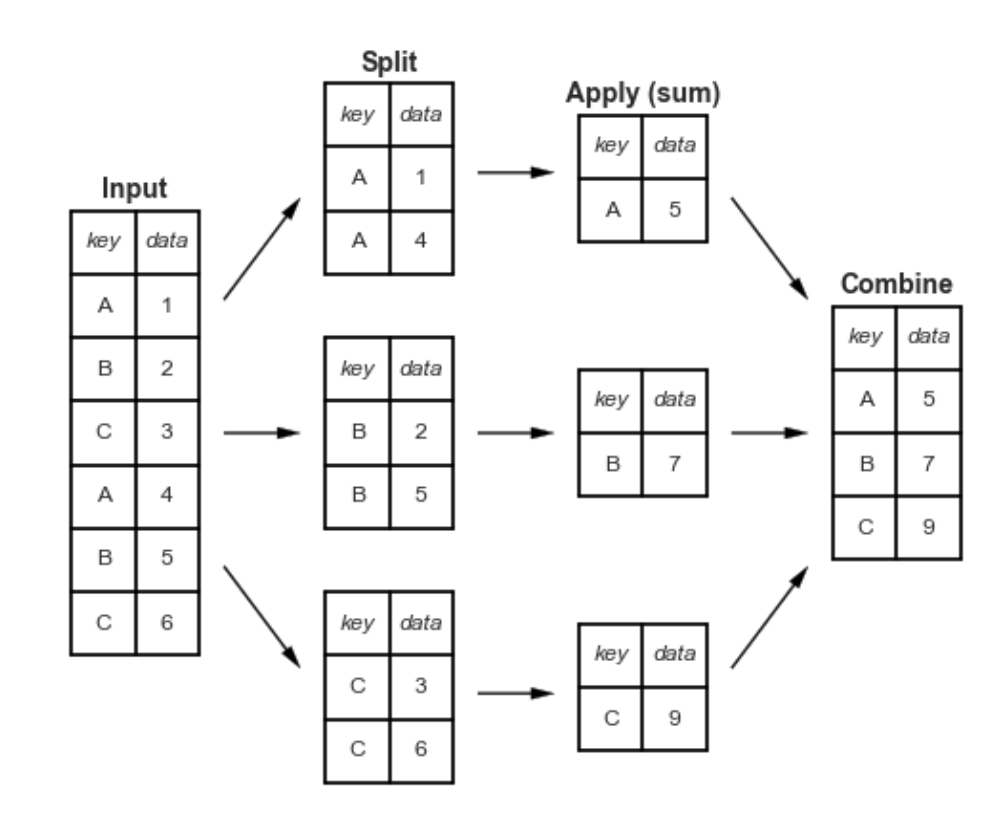

This makes it clear what `groupby` accomplishes:
- The *split* step involves breaking up and grouping a `DataFrame` depending on the value of the specified key.
- The *apply* step involves computing some function within the individual groups.
- The *combine* step merges the results of these operations into an output array.

While this could certainly be done manually using some combination of the masking, aggregation, and merging commands covered earlier, the power of the `GroupBy` is that it abstracts away these steps: the user doesn't need to think about how the computation is done under the hood, but rather thinks about the operation as a whole. 

In [ ]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df


The most basic split-apply-combine operation can be computed with the `groupby()` method of `DataFrame`s, passing the name of the desired key column. 

In [ ]:
df.groupby('key')

Notice that what is returned is not a set of `DataFrame`s, but a `DataFrameGroupBy` object. You can think of it as a special view of the `DataFrame`, which is poised to dig into the groups but does no actual computation until the aggregation is applied. 

**The GroupBy object**
The `GroupBy` object is a very flexible abstraction. In many ways, you can simply treat it as if it's a collection of `DataFrame`s. 

In [ ]:
df.groupby('key').sum()

**Column indexing**


In [ ]:
planets.groupby('method')

In [ ]:
planets.groupby('method')['orbital_period']

In [ ]:
planets.groupby('method')['orbital_period'].median()

**Iteration over groups**
The `GroupBy` object supports direct iteration over the groups, returning each group as a `Series` or `DataFrame`:

In [ ]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

**Dispatch methods**
Any method not explicitly implemented by the `GroupBy` object will be passed through and called on the groups, whether they are `DataFrame` or `Series` objects. For example, you can use the `describe()` method of `DataFrame`s to perform a set of aggregations that describe each group in the data:

In [ ]:
planets.groupby('method')['year'].describe()

Notice that dispatch methods are applied to *each individual group* and the results are then combined within `GroupBy` and returned. Any valid `DataFrame`/`Series` method can be used on the corresponding `GroupBy` object. 

**Aggregate, filter, transform, apply**
`GroupBy` objects have `aggregate()`, `filter()`, `transform()`, and `apply()` methods that efficiently implement a variety of useful operations before combining the grouped data.

In [ ]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

**Aggregation**
We're now familiar with `GroupBy` aggregations with `sum()`, `median()`, but the `aggregate()` method allows for even more flexibility. It can take a string, a function, or a list thereof and compute all the aggregates at once. 

In [ ]:
df.groupby('key').aggregate(['min', np.median, max])

Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column:

In [ ]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

**Filtering**
A filtering operation allows you to drop data based on the group properties. For example, we might want to keep all groups in which the standard deviation is larger than some critical value.

In [ ]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")


**Transformation**
While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data. For such a transformation, the output is the same shape as the input. A common example is to center the data by subtracting the group-wise mean: 

In [ ]:
df.groupby('key').transform(lambda x: x - x.mean())

**The `apply()` method**
The `apply()` method lets you apply an arbitrary function to the group results. The function should take a `DataFrame` and return either a Pandas object (e.g., `DataFrame`, `Series`) or a scalar.

For example, here is an `apply()` that normalizes the first column by the sum of the second:

In [ ]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

**Specify the split key**
In the simple examples presented before, we split the `DataFrame` on a single column name. There are more options for group specification. 

**A list, array, series, or index providing the grouping keys**
The key can be any series or list with a length matching that of the `DataFrame`.

In [ ]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

In [ ]:
display('df', "df.groupby(df['key']).sum()")

**A dictionary or series mapping index to group**
Another method is to provide a dictionary that maps index values to the group keys:

In [ ]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

**Any Python function**
You can pass any Python function that will input the index value and output the group.

In [ ]:
display('df2', 'df2.groupby(str.lower).mean()')

**A list of valid keys**
Any of the preceding key choices can be combined to group on a multi-index:

In [ ]:
df2.groupby([str.lower,mapping]).mean()

**Grouping example**

In [ ]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

**Pivot Tables**
A *pivot table* is commonly seen in spreadsheets and other programs that operate on tabular data. The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summary of the data.

The difference between pivot tables and `GroupBy` can sometimes cause confusion; it helps me to think of pivot tables as a *multidimensional* version of `GroupBy` aggregation. That is, you split-apply-combine, but both the split and combine happen across not a one-dimensional index, but across a two-dimensional grid.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

In [ ]:
titanic.groupby('sex')[['survived']].mean()

In [ ]:
titanic.groupby(['sex','class'])['survived'].mean().unstack()

This two-dimensional `GroupBy` is common enough that Pandas includes a convenience routine, `pivot_table`, which succintly handles this type of multi-dimensional aggregation. The code is much more readable and produces the same result.

In [ ]:
titanic.pivot_table('survived',index='sex',columns='class')

**Multi-level pivot tables**
`pd.cut` allows us to apply binning. 
`pd.qcut` computes quantiles.

In [ ]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', index = ['sex', age], columns = 'class')

In [ ]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived',index=['sex',age],columns=[fare,'class'])

**Additional pivot table options**
```python
# call signature as of Pandas 0.18
DataFrame.pivot_table(data, values=None,index=None,columns=None,
                     aggfunc='mean',fill_value=None,margins=False,
                     dropna=True, margins_name='All')```
               
The `aggfunc` keyword controls what type of aggregation is applied, which is mean by default.The aggregation specification can be a string representing common choices like`'sum'`,`'mean'`,`'count'`,`'min'`,`'max'`, etc. or a function that implements an aggregation (e.g., `np.sum()`,`min()`,`sum()`,etc.). Additionally, it can be specified as a dictionary mapping a column to any of the above desired options.

In [ ]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

At times it's useful to compute totals along each grouping. This can be done via the `margins` keyword. The margin label can be specified with the `margins_name` keyword, which defaults to `'All'`. 

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

**Example: Birthrate Data**

In [ ]:
# shell command to download the data:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [ ]:
births = pd.read_csv('data/births.csv')
births.head()

We can start to understand this data a bit more by using a pivot table.

In [ ]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

We are going to want to clean the data a bit, removing outliers caused by mistyped dates (e.g., June 31st) or missing values (e.g., June 99th). One easy way to remove these all at once is to cut outliers; we'll do this via a robust sigma-clipping operation:

In [ ]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

The final line is a robust estimate of the sample mean, where 0.74 comes from the interquartile range of a Gaussian distribution. With this we can use the `query()` method to filter-out rows with births outside these values.

In [ ]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [ ]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

Finally, we can combine the day, month, and year to create a Date index. This allows us to quickly compute the weekday corresponding to each row.

In [ ]:
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek
births

In [ ]:
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [ ]:
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date

In [ ]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

In [ ]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

**Vectorized String Operations**
We saw in previous sections how tools like NumPy and Pandas generalize arithmetic operations so that we can easily and quickly perform the same operations on many array elements. 

In [ ]:
import numpy as np
x=np.array([2,3,5,7,11,13])
x*2

This *vectorization* of operations simplifies the syntax off operating on arrays of data: we no longer have to worry about the size of shape of the array, but just about what operation we want done. For arrays of strings, NumPy does not provide such simple access, and thus you're stuck using a more verbose loop.

In [ ]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

This is sufficient to work with some data, but it will break if there are any missing values. Pandas includes features to address both this need for vectorized string operations and for correctly handling missing data via the `str` attribute of Pandas Series and Index objects containing strings.

In [ ]:
import pandas as pd
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']

names = pd.Series(data)
names

We can now call a single method that will capitalize all the entries, while skipping over any missing values.

In [ ]:
names.str.capitalize()

Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. 
- `len()`	
- `lower()`	
- `translate()`	
- `islower()`
- `ljust()`	
- `upper()`	
- `startswith()`	
- `isupper()`
- `rjust()`	
- `find()`	
- `endswith()`	
- `isnumeric()`
- `center()`	
- `rfind()`	
- `isalnum()`	
- `isdecimal()`
- `zfill()`	
- `index()`	
- `isalpha()`	
- `split()`
- `strip()`	
- `rindex()`	
- `isdigit()`	
- `rsplit()`
- `rstrip()`	
- `capitalize()`	
- `isspace()`	
- `partition()`
- `lstrip()`	
- `swapcase()`	
- `istitle()`	
- `rpartition()`

**Methods using regular expressions**
There are several methods that accept regular expressions to examine the content of each string element. 

|**Method**|**Description**|
|----------|---------------|
|`match()`|Call `re.match()` on each element, returning a boolean.|
|`extract()`|	Call `re.match()` on each element, returning matched groups as strings.|
|`findall()`	| Call `re.findall()` on each element|
|`replace()`	|Replace occurrences of pattern with some other string|
|`contains()`	|Call `re.search()` on each element, returning a boolean|
|`count()`	|Count occurrences of pattern|
|`split()`	|Equivalent to `str.split()`, but accepts regexps|
|`rsplit()`	|Equivalent to `str.rsplit()`, but accepts regexps|

**Miscellaneous methods**

|**Method**|**Description**|
|----------|---------------|
|`get()`	|Index each element|
|`slice()`|	Slice each element|
|`slice_replace()`|	Replace slice in each element with passed value|
|`cat()`|	Concatenate strings|
|`repeat()`|	Repeat values|
|`normalize()`|	Return Unicode form of string|
|`pad()`|	Add whitespace to left, right, or both sides of strings|
|`wrap()`|	Split long strings into lines with length less than a given width|
|`join()`|Join strings in each element of the Series with passed separator|
|`get_dummies()`|	extract dummy variables as a dataframe|

**Vectorized item access and slicing**
The `get()` and `slice()` operations, enable vectorized element access from each array. 

**Indicator variables**
The `get_dummies()` method is useful when your data has a column containing some sort of coded indicator. For example, we might have a dataset that contains information in the form of codes, such as A="born in America," B="born in the United Kingdom," C="likes cheese," D="likes spam":

In [ ]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

The `get_dummies()` routine lets you quickly split-out these indicator variables into a `DataFrame`:

In [ ]:
full_monte['info'].str.get_dummies('|')

**Example: Recepie Database**

In [ ]:
!curl -O http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz
!gunzip recipeitems-latest.json.gz

In [ ]:
try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print("ValueError:", e)

In [ ]:
with open('recipeitems-latest.json') as f:
    line = f.readline()
pd.read_json(line).shape

In [ ]:
try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print("ValueError:", e)

**Working with time series**
Date and time data come in a few flavors:
- *time stamps* reference particular momments in time 
- *time intervals* and *periods* reference a length of time between a particular begining and end point. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap. 
- *time deltas* or *durations* reference an exact length of time 

While the time series tools provided by Pandas tend to be the most useful for data science applications, it is helpful to see their relationship to other packages used in Python. 

**Native Python dates and times: `datetime` and `dateutil`**
The power of `datetime` and `dateutil` lie in their flexibility and easy syntax. Where they break down is when you wish to work with large arrays of dates and times.

In [ ]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

In [ ]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

Once you have a `datetime` object, you can do things like printing the day of the week:

In [ ]:
date.strftime('%A')

**Typed arrays of times: NumPy's `datetime64`**
The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy. The `datetime64` dtype encodes dates as 64-bit integers. This allows arrays of dates to be represented very compactly.

In [ ]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

Once we have this date formatted, we can quickly do vectorized operations on it:

In [ ]:
date + np.arange(12)

While the `datetime64` data type addresses some of the deficiencies of the built-in Python `datetime` type, it lacks many of the convenient methods and functions provided by `datetime` and especially `dateutil`.

**Dates and times in pandas: best of both worlds**
Pandas builds upon all the tools just discussed to provide a `Timestamp` object, which combines the ease-of-use of `datetime` and `dateutil` with the efficient storage and vectorized interface of `numpy.datetime64`. From a group of these `Timestamp` objects, Pandas can construct a `DatetimeIndex` that can be used to index data in a `Series` or `DataFrame`.

In [ ]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

In [ ]:
date.strftime('%A')

Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [ ]:
date + pd.to_timedelta(np.arange(12), 'D')

**Pandas Time Series: Indexing by Time**

In [ ]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

There are special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [ ]:
data['2015']

**Pandas Time Series Data Structures**
- for *time stamps*, Pandas provides the `Timestamp` type. The associated index structure is `DatetimeIndex`.
- for *time periods*, Pandas provides the `Period` type. The associated index structure is `PeriodIndex`.
- for *time deltas* or *durations*, pandas provides the `Timedelta` type. The associated index structure is `TimedeltaIndex`.

**Regular sequences: `pd.date_range()`**
To make the creation of regular date sequences more convenient, pandas offers a few functions: `pd.date_range()` for timestamps, `pd.period_range()` for periods, and `pd.timedelta_range()` for time deltas.

In [ ]:
pd.date_range('2015-07-03', '2015-07-10')

In [ ]:
pd.date_range('2015-07-03', periods=8)

In [ ]:
pd.period_range('2015-07', periods=8, freq='M')

In [ ]:
pd.timedelta_range(0, periods=10, freq='H')

**Frequencies and Offsets**
The following table summarizes the main codes available:

|**Code** | **Description**|
|---------|----------------|
|`D`	| Calendar day |
|`W`	|Weekly	|
|`M`	|Month end |
|`MS`	|Month start|
|`Q`	|Quarter end|
|`QS`	|Quarter start|
|`A`	|Year end|	
|`AS`	|Year start|
|`H`	|Hours	|
|`T`	|Minutes|	
|`S`	|Seconds|		
|`L`	|Milliseonds|		
|`U`	|Microseconds|		
|`N`	|nanoseconds|	
|`B`	|Business day|
|`BM`	|Business month end|
|`BMS`	|Business month start|
|`BQ`	|Business quarter end|
|`BQS`	|Business quarter start|
|`BA`	|Business year end|
|`BAS`	|Business year start|
|`BH`	|Business hours|

**Resampling, Shifting, and Windowing**

In [ ]:
!pip install pandas-datareader

In [ ]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()

In [ ]:
goog = goog['Close']

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [ ]:
goog.plot();

**Resampling and converting frequencies**
One common need for time series data is resampling at a higher or lower frequency. This can be done using the `resample()` method, or the much simpler `asfreq()` method. The primary difference between the two is that `resample()` is fundamentally a *data aggregation* while `asfreq()` is fundamentally a *data selection*

In [ ]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

A related package to be aware of is `pytz` which includes tools for working with time zones.

**High-Performance Pandas: `eval()` and `query()`**

**Motivating `query()` and `eval()`: Compound Expressions**
We've seen previously that NumPy and Pandas support fast vectorized operations.

In [ ]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(1000000)
y = rng.rand(1000000)
%timeit x + y

But this abstraction becomes less efficient when computing compound expressions. 

In [ ]:
mask = (x > 0.5) & (y < 0.5)

Because NumPy evaluates each subexpression, this is roughly equivalent to:

In [ ]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

This means that every intermediate step is explicitly allocated in memory. If the `x` and `y` arrays are very large, this can lead to significant memory and computational overhead. The Numexpr library gives you the ability to compute this type of compound expression element by element, without the need to allocate full intermediate arrays.

In [ ]:
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask,mask_numexpr)

The Pandas `eval()` and `query()` tools are conceptually similar, and depend on thr Numexpr package.

**`pd.eval()` for efficient operations**
`pd.eval()` supports all arithmetic operators, comparison operators (including chained expressions), the `&` and `|` bitwise operators, `and` and `or`. It even supports access to object attributes via the `obj.attr` syntax and indexes via the `obj[index]` syntax. Other operations such as function calls, conditional statements, loops, and other more involved constructs are currently *not* implemented in `pd.eval()`

In [ ]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

In [ ]:
%timeit df1 + df2 + df3 + df4

In [ ]:
%timeit pd.eval('df1 + df2 + df3 + df4')

In [ ]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                           for i in range(5))

**`DataFrame.eval()` for Column-Wise Operations**
Just as Pandas has a top-level `pd.eval()` function, `DataFrame`s have an `eval()` method that works in a similar way. The benefit of `eval()` is that columns can be referred to by name. 

In [ ]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

In [ ]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")

The `DataFrame.eval()` method allows much more succint evaluation of expressions with the columns. Notice here that we treat column names as variables within the evaluated expression.

**Assignment in `DataFrame.eval()`**
We can use `df.eval()` to create a new column `'D'` and assign to it a value computed from the other columns. 

In [ ]:
df.head()

In [ ]:
df.eval('D = (A+B)/C',inplace=True)
df.head()

In the same way, any existing column can be modified.

In [ ]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

**Local variables in `DataFrame.eval()`**
The `DataFrame.eval()` method supports additional syntax that lets it work with local Python variables.

The `@` character here marks a *variable name* rather than a *column name* and lets you efficiently evaluate expressions involving two "namespaces": the namespace of columns and the namespace of Python objects.

In [ ]:
column_mean = df.mean(1)
result2 = df.eval('A + @column_mean')

**`DataFrame.query()` Method**
Is a more efficient computation and is also much easier to understand.

In [ ]:
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
result3 = df.query('A < 0.5 and B < 0.5')

In [ ]:
result2.shape

In [ ]:
result3.shape